# Zomato Bangalore Recomendation Analysis

##  Author : Rammya Dharshini K

LGM - SoC'21 : Participants

### Import Required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns
import json
import re
from collections import Counter,OrderedDict
from ipywidgets import interact, interactive, fixed, interact_manual,Layout
import ipywidgets as widgets

In [ ]:
#!pip install gmaps

In [3]:
import gmaps
import gmaps.datasets
gmaps.configure(api_key = # "---Your google api key----" )

### Load Dataset

In [4]:
df = pd.read_csv('/content/indian_restaurants_details_cleaned_data.csv')

In [5]:
df.head()

,zomato_url,name,city,area,rating,rating_count,telephone,cusine,cost_for_two,address,timings,online_order,table_reservation,delivery_only,famous_food,longitude,latitude
0,https://www.zomato.com/ncr/sainik-food-pandav-...,Sainik Food,Delhi NCR,Pandav Nagar,3.2,21.0,011 22486474 +91 9717806814,North Indian,300.0,"C 4/1, Opposite Mother Dairy, Pandav Nagar, Ne...","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",False,False,False,NaN,77.284871,28.617732
1,https://www.zomato.com/mumbai/kunals-creamery-...,Kunal's Creamery & Eatery,Mumbai,Ambernath,3.6,51.0,+91 9561356690 +91 9637537499,"Street Food, Chinese, Fast Food",500.0,"Shop 14, Trishul Shivdham Complex, Shiv Mandir...","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1...",False,False,False,Penne Pasta,73.184287,19.205887
2,https://www.zomato.com/ncr/brij-palace-restaur...,Brij Palace Restaurant,Delhi NCR,Jasola,NaN,NaN,+91 9891828106,North Indian,250.0,"4, Okhla Bus Stand, Jamia Nagar, Near, Jasola,...","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...",False,False,False,"Chana Masala , Butter Naan , Paneer Bhujia , D...",77.291223,28.563034
3,https://www.zomato.com/ncr/sahib-hotel-paharga...,Sahib Hotel,Delhi NCR,Paharganj,NaN,NaN,+91 9670005455,North Indian,300.0,"121, Amrit Kaur Market, Opposite New Delhi Rai...","{'Mon': [1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1...",False,False,False,NaN,77.218298,28.642411
4,https://www.zomato.com/kolkata/chunkys-shibpur...,Chunky's,Kolkata,Shibpur,3.0,78.0,+91 8442828284,"Italian, Pizza, Continental",500.0,"523, G.T Road, Howrah., Shibpur, Howrah","{'Mon': [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...",True,False,False,NaN,88.330708,22.577758


### Data Analysis

In [6]:
df.columns

Index(['zomato_url', 'name', 'city', 'area', 'rating', 'rating_count',
       'telephone', 'cusine', 'cost_for_two', 'address', 'timings',
       'online_order', 'table_reservation', 'delivery_only', 'famous_food',
       'longitude', 'latitude'],
      dtype='object')

### To find Famous Cusine in Bangalore

In [7]:
def find_famous_cusines(data_frame,title,min_no_of_cusines):    
    cusines = data_frame['cusine'].dropna()
    all_cus = list()
    for cusine in cusines:
            temp =c usine.split(',')
            for t in temp:
                all_cus.append(t.strip().lower())
    cus_counter=dict(Counter(all_cus))
    cus_dict= OrderedDict()
    cus_list=[]
    cou_list=[]
    
    for key, value in sorted(cus_counter.items(), key=lambda item: item[1],reverse=True ):
        cus_dict[key]=value
        if value > min_no_of_cusines:
            cus_list.append(key)
            cou_list.append(value)
    sns.set(style="whitegrid")
    plt.figure(figsize=(15,10))  
    sns.barplot(x= cou_list,y=cus_list)
    plt.xlabel("Number of restaurants",size=18)
    plt.title(title,size=24)
    for tick in plt.gca().get_yticklabels():
        tick.set_fontsize(12)
    plt.show()


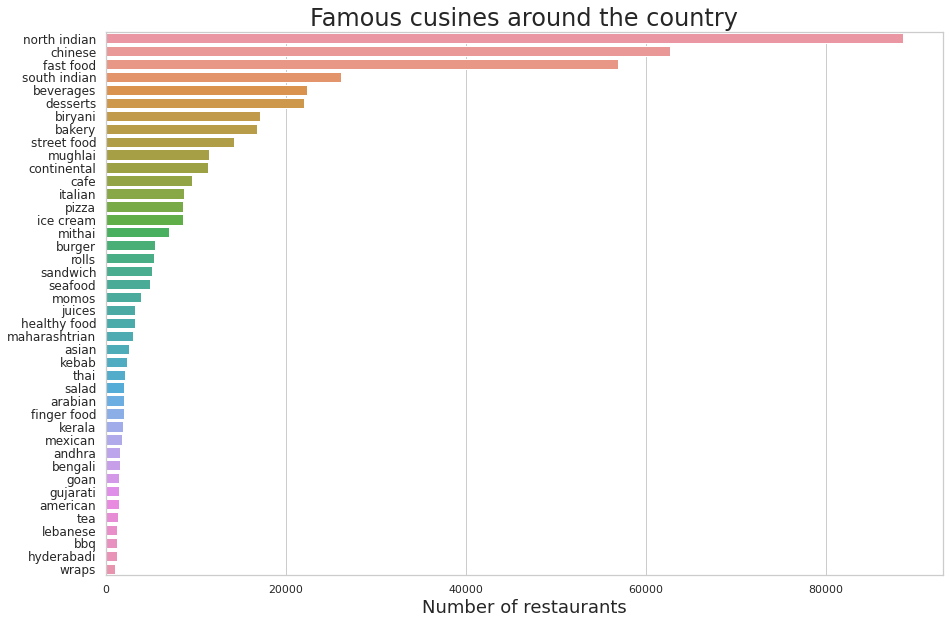

In [8]:
find_famous_cusines(df,"Famous cusines around the country",1000)

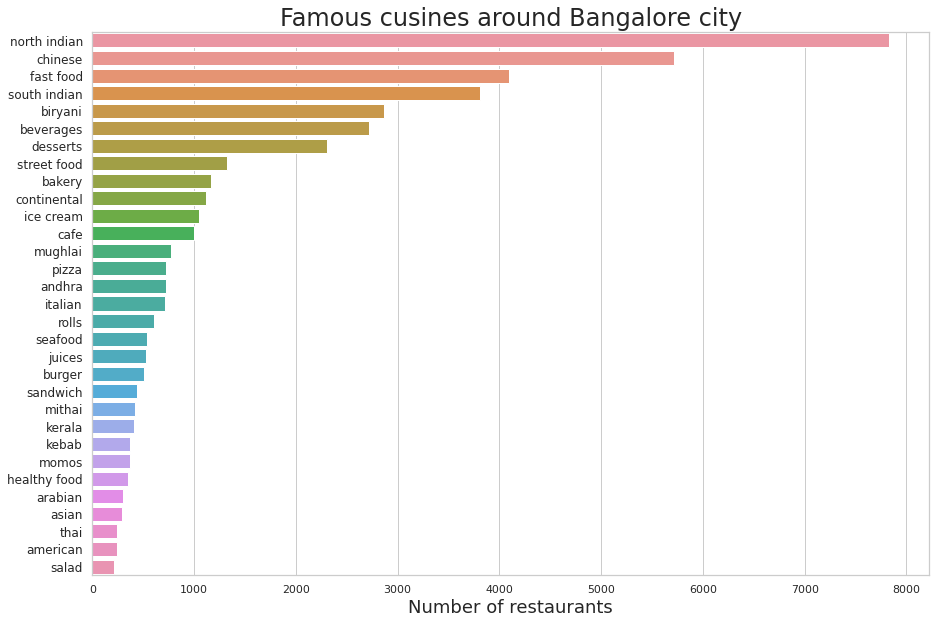

In [10]:
df_bangalore = df[df.city == "Bengaluru"]

find_famous_cusines(df_bangalore,"Famous cusines around Bangalore city",200)

### Heat-Map Around the India

In [44]:
india_map_df = df[['latitude', 'longitude']]
india_map_df=india_map_df[(india_map_df.latitude > 0) & (india_map_df.longitude >0) ]
india_map_df.dropna(inplace=True)
heatmap = gmaps.heatmap_layer(india_map_df)
heatmap.max_intensity = 5000
heatmap.point_radius = 10
centre_coord=(np.mean( india_map_df.latitude),np.mean( india_map_df.longitude))
fig = gmaps.figure(center=centre_coord,zoom_level=4)
fig.add_layer(heatmap)
fig

Figure(layout=FigureLayout(height='420px'))

### Heat-Map Around the Bangalore

In [51]:
df_bagalore = df[df.city=="Bengaluru"]
bangalore_map_df = df_bangalore[['latitude', 'longitude']]
bangalore_map_df = bangalore_map_df[(bangalore_map_df.latitude > 0) & (bangalore_map_df.longitude >0) ]
bangalore_map_df.dropna(inplace=True)
heatmap_bangalore = gmaps.heatmap_layer(bangalore_map_df)
heatmap_bangalore.max_intensity = 20
heatmap_bangalore.point_radius = 5

centre_coord_bangalore=(np.mean(bangalore_map_df.latitude),np.mean(bangalore_map_df.longitude))
fig_bangalore = gmaps.figure(center=centre_coord_bangalore,zoom_level=10)
fig_bangalore.add_layer(heatmap_bangalore)
fig_bangalore

Figure(layout=FigureLayout(height='420px'))

### Restaurant of top cities in India

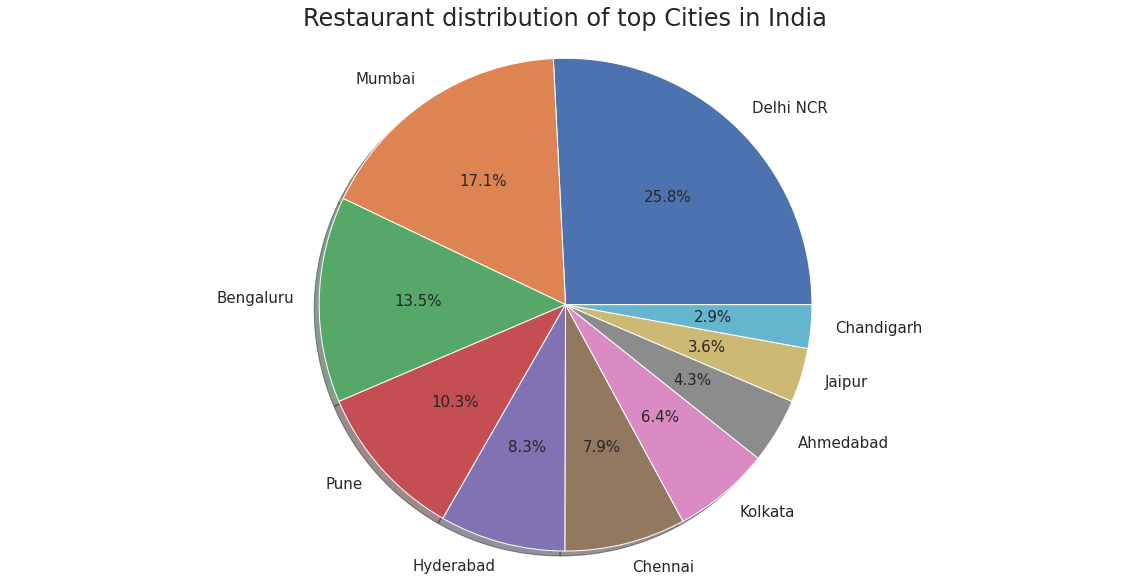

In [52]:
restaurant_chains=df.city.value_counts()[:10]

fig1, ax1 = plt.subplots(figsize=(20,10))
patches, texts, autotexts=ax1.pie(restaurant_chains.values,  labels=restaurant_chains.index, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')
plt.title("Restaurant distribution of top Cities in India",size=24)
for text in texts:
    text.set_fontsize(15)
for text in autotexts:
    text.set_fontsize(15)
plt.show()

### Famous Restaurant in India

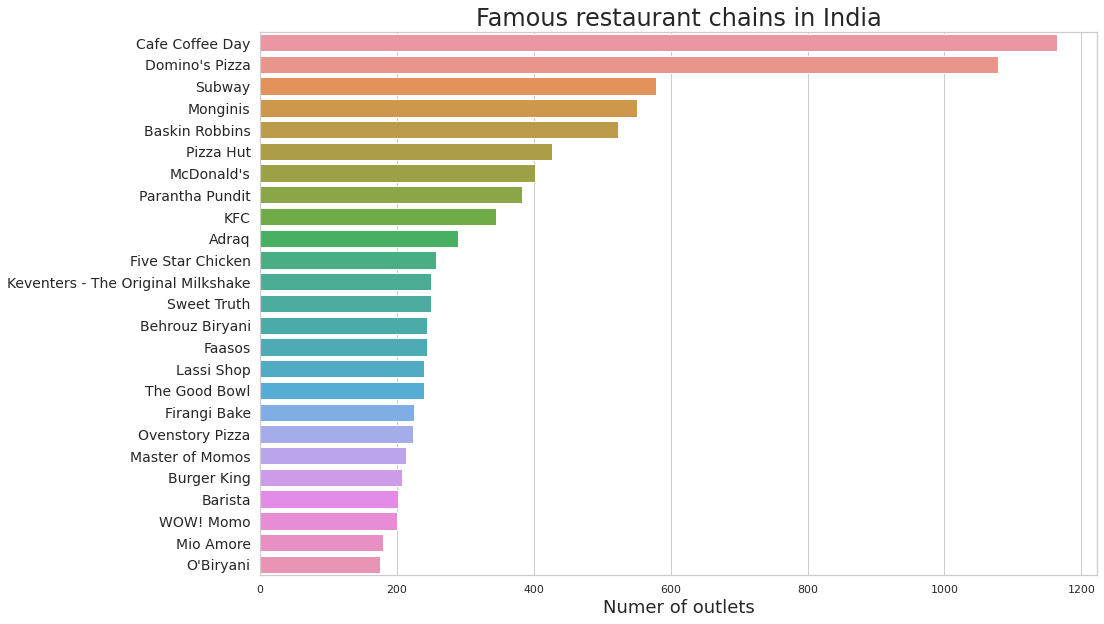

In [53]:
def find_famous_restaurant_chains(title,df):
    restaurant_chains=df.name.value_counts()[:25]
    sns.set(style="whitegrid")
    plt.figure(figsize=(15,10))  
    sns.barplot(x= restaurant_chains.values,y=restaurant_chains.index)
    plt.xlabel("Numer of outlets",size=18)
    plt.title(title,size=24)
    for tick in plt.gca().get_yticklabels():
        tick.set_fontsize(14)
    
    plt.show()
find_famous_restaurant_chains("Famous restaurant chains in India",df)


### Famous Restaurant in Bangalore

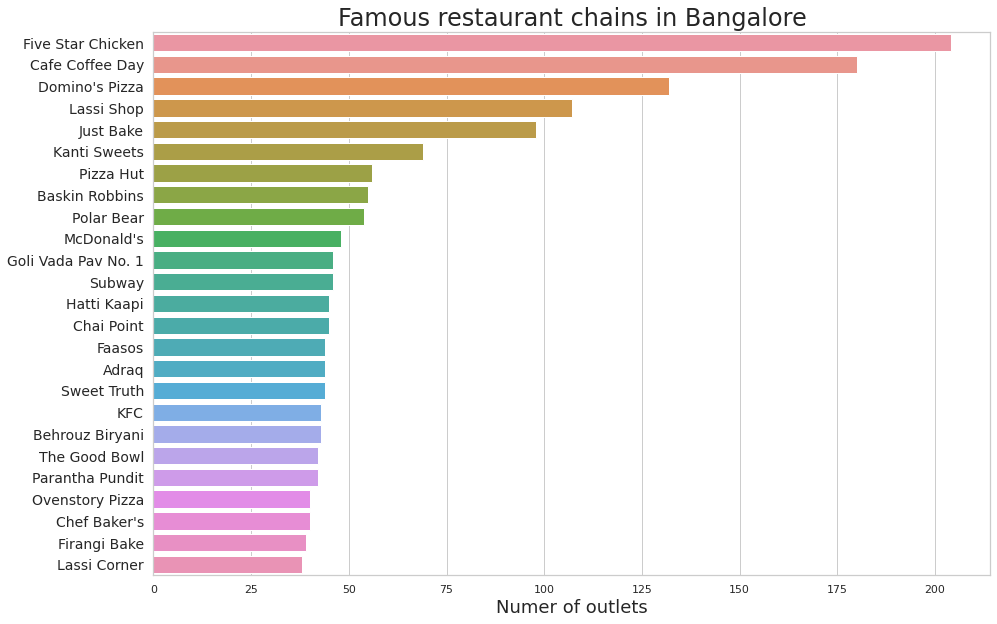

In [54]:
find_famous_restaurant_chains("Famous restaurant chains in Bangalore",df[df.city=="Bengaluru"])

### Rating Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


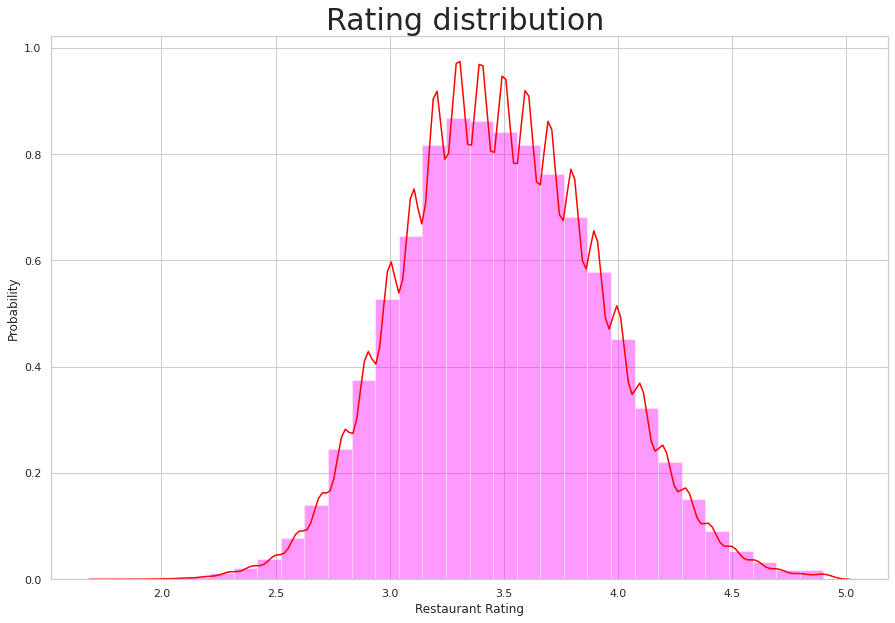

In [57]:
plt.figure(figsize=(15,10)) 
sns.distplot(df.rating.dropna(),bins=30,color='magenta',kde_kws={"color": "red"})
plt.ylabel("Probability")
plt.xlabel("Restaurant Rating")
plt.title("Rating distribution ",size=30)
plt.show()

### Cost distribution

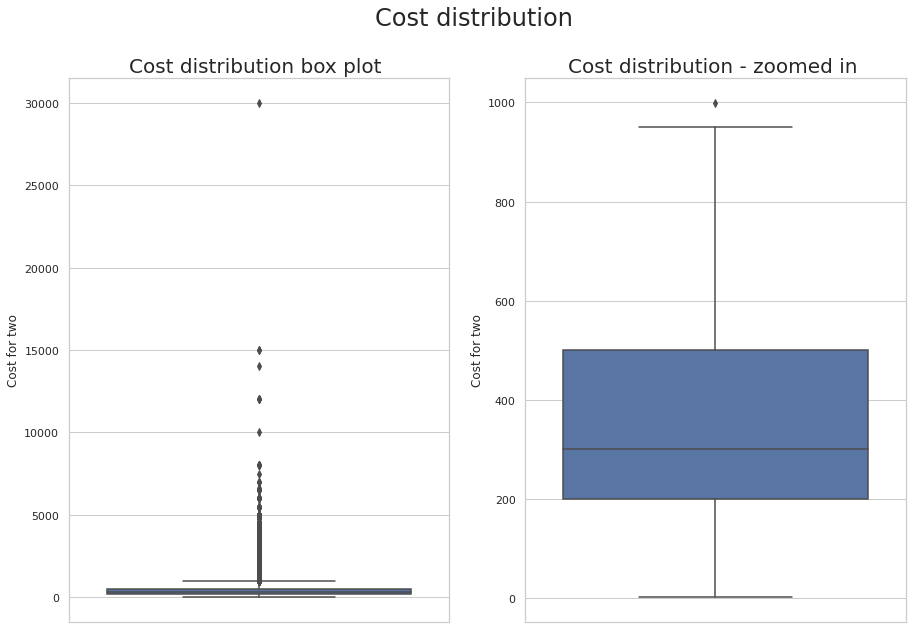

In [58]:
fig, ax = plt.subplots(figsize =(15,10)) 
plt.subplot(1,2,1)
sns.boxplot(y=df.cost_for_two.dropna())
plt.ylabel("Cost for two")
plt.title("Cost distribution box plot ",size=20)
plt.subplot(1,2,2)
sns.boxplot( y = df.cost_for_two.dropna()[(df.cost_for_two<1000)])
plt.ylabel("Cost for two")
plt.title("Cost distribution - zoomed in ",size=20)
plt.suptitle("Cost distribution",size=24)
plt.show()

### Restaurants accepting online order in bangalore

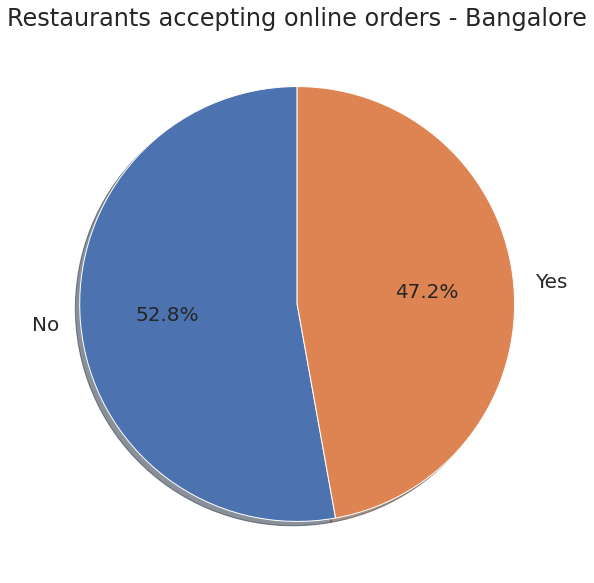

In [59]:
def plot_online_orders_static(df_oo,title):
    online_orders=df_oo.online_order.value_counts()

    idx_list=online_orders.index.tolist()
    
    if idx_list[0]==True:
        idx_list[0]="Yes"
        idx_list[1]="No"
    else:
        idx_list[1]="Yes"
        idx_list[0]="No"
    online_orders.index=idx_list 
    
    plt.figure(figsize=(15,10))
    plt.pie(x=online_orders.values,labels=online_orders.index, autopct='%1.1f%%',
            shadow=True, startangle=90,textprops={'size':20})
    plt.title(title,size=24)
    plt.show()
    
plot_online_orders_static(df[df.city=="Bengaluru"],"Restaurants accepting online orders - Bangalore")  

### Table Reservation in bangalore

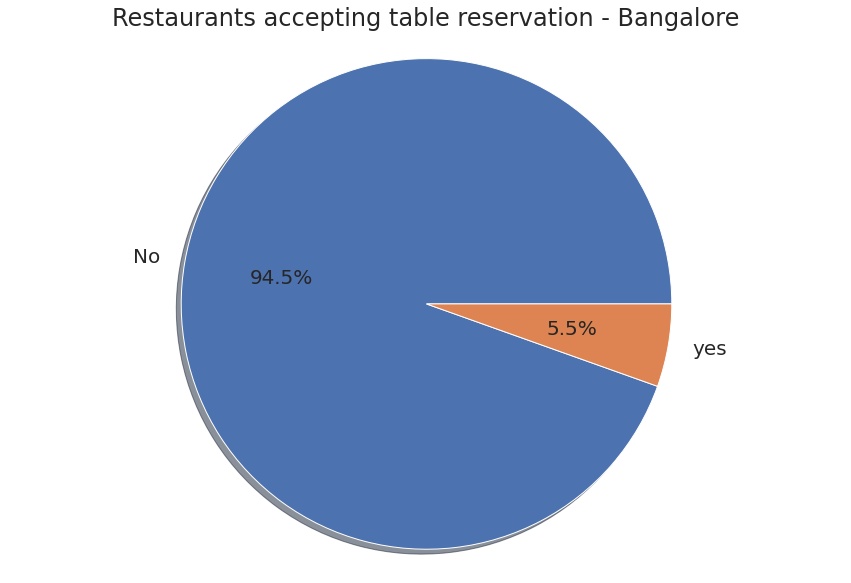

In [61]:
def plot_table_reserve_static(df_tr,title):
    table_reserve=df_tr.table_reservation.value_counts()

    idx_list=table_reserve.index.tolist()
    if idx_list[0]==True:
        idx_list[0]="yes"
        idx_list[1]="No"
    else:
        idx_list[1]="yes"
        idx_list[0]="No"
    table_reserve.index=idx_list 
    
    plt.figure(figsize=(15,10))
    plt.pie(x=table_reserve.values,labels=table_reserve.index, autopct='%1.1f%%',
            shadow=True, startangle=0,textprops={'size':20})
    plt.title(title,size=24)
    plt.gca().axis('equal')
    plt.show()

plot_table_reserve_static(df[df.city=="Bengaluru"],"Restaurants accepting table reservation - Bangalore")   
    

### Restaurants accepting Delivery in Bangalore

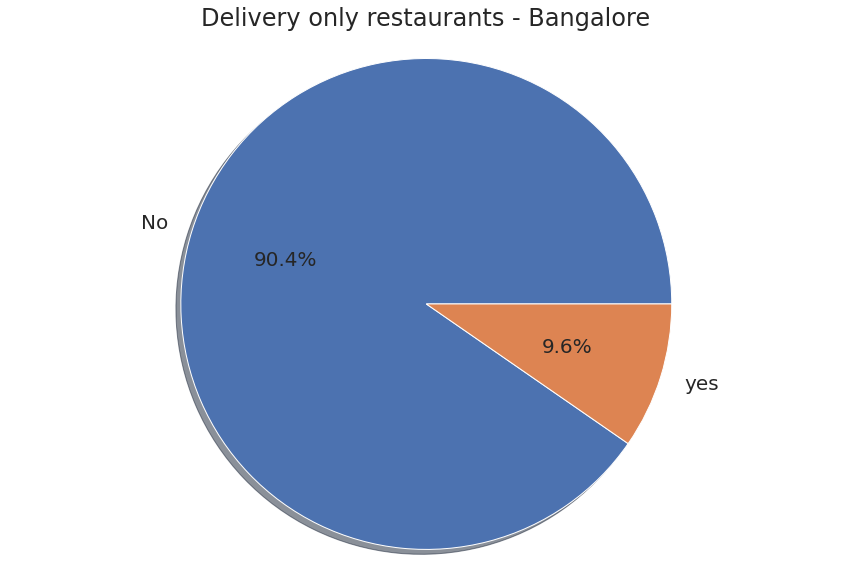

In [62]:
def plot_delivery_only_static(df_tr,title):
    delivery_only=df_tr.delivery_only.value_counts()

    idx_list=delivery_only.index.tolist()
    if idx_list[0]==True:
        idx_list[0]="yes"
        idx_list[1]="No"
    else:
        idx_list[1]="yes"
        idx_list[0]="No"
    delivery_only.index=idx_list 
    
    plt.figure(figsize=(15,10))
    plt.pie(x=delivery_only.values,labels=delivery_only.index, autopct='%1.1f%%',
            shadow=True, startangle=0,textprops={'size':20})
    plt.title(title,size=24)
    plt.gca().axis('equal')
    plt.show()


plot_delivery_only_static(df[df.city=="Bengaluru"],"Delivery only restaurants - Bangalore")   

### Opening time of Restaurants in Bangalore

In [63]:
g_days={}
def get_timings(row):
    global g_days
    if type(row) is str:
        try:
            days = json.loads(row.replace("'",'"'))
            for day in days:
                for hour,state in enumerate( days[day]):
                    if state > 0:
                        g_days[day][hour] =g_days[day][hour]+ state
        except:
            print(row)
    else:
        pass
    return row

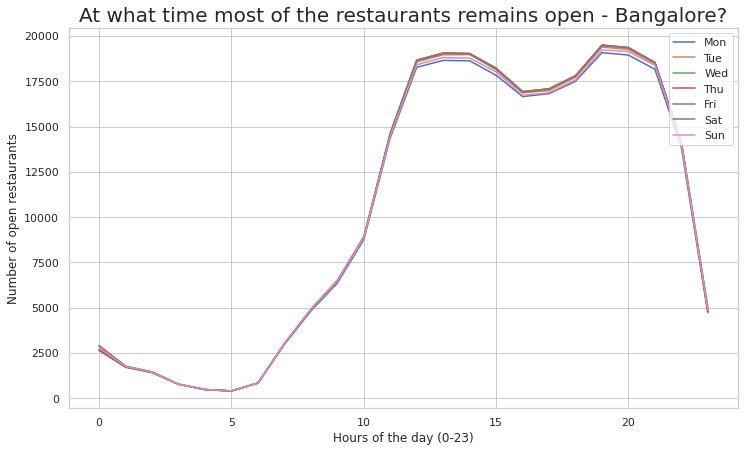

In [64]:
def plot_restaurants_open_static(df_tr,title):
    global g_days
    g_days={'Mon': np.zeros(24), 'Tue': np.zeros(24), 'Wed': np.zeros(24), 'Thu': np.zeros(24), 'Fri': np.zeros(24), 'Sat': np.zeros(24), 'Sun': np.zeros(24)}
    _=df_tr['timings'].apply(get_timings)
    
    plt.figure(figsize=(12,7))
    plt.plot(np.arange(0,24), g_days['Mon'])
    plt.plot(np.arange(0,24), g_days['Tue'])
    plt.plot(np.arange(0,24), g_days['Wed'])
    plt.plot(np.arange(0,24), g_days['Thu'])
    plt.plot(np.arange(0,24), g_days['Fri'])
    plt.plot(np.arange(0,24), g_days['Sat'])
    plt.plot(np.arange(0,24), g_days['Sun'])
    plt.legend(('Mon', 'Tue', 'Wed','Thu','Fri','Sat','Sun'),
               loc='upper right')
    plt.title(title,size=20)
    plt.ylabel("Number of open restaurants")
    plt.xlabel("Hours of the day (0-23)")
    plt.show()


plot_restaurants_open_static(df[df.city=="Bengaluru"],"At what time most of the restaurants remains open - Bangalore?")

### Night Time Restaurants in bangalore

In [65]:
def get_night_restaurants(row): 
    timings=row['timings']
    if type(timings) is str:
        days = json.loads(timings.replace("'",'"'))
        day="Mon"
        for hour,state in enumerate( days[day]):
                if state > 0 and (hour<5 ):
                    return row

In [66]:
bangalore_map_df = df[df.city=="Bengaluru"]
bangalore_map_df = bangalore_map_df.apply(get_night_restaurants,axis=1,result_type='broadcast')
bangalore_map_df.dropna(inplace=True)

bangalore_map_df = bangalore_map_df[['latitude', 'longitude']]
bangalore_map_df = bangalore_map_df[(bangalore_map_df.latitude > 0) & (bangalore_map_df.longitude >0) ]


heatmap_bangalore = gmaps.heatmap_layer(bangalore_map_df)
heatmap_bangalore.max_intensity = 10
heatmap_bangalore.point_radius = 5

centre_coord_bangalore = (np.mean(bangalore_map_df.latitude),np.mean(bangalore_map_df.longitude))
fig_bangalore = gmaps.figure(center=centre_coord_bangalore,zoom_level=10)
fig_bangalore.add_layer(heatmap_bangalore)
fig_bangalore

Figure(layout=FigureLayout(height='420px'))

### Mid-night Opening Restaurants in Bangalore

In [67]:
def get_midnight_restaurants(row): 
    timings=row['timings']
    if type(timings) is str:
        days = json.loads(timings.replace("'",'"'))
        day="Mon"
        for hour,state in enumerate( days[day]):
                if state > 0 and (hour<5 ):
                    return row

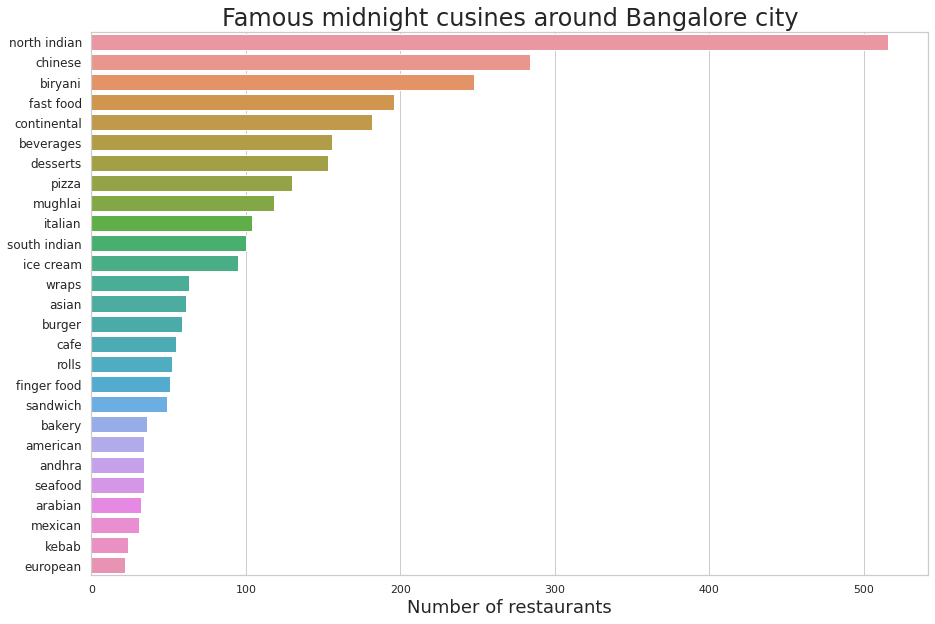

In [68]:
def find_famous_cusines_at_midnight(data_frame,title,min_no_of_cusines): 
    data_frame = data_frame.apply(get_midnight_restaurants,axis=1,result_type='broadcast')
    data_frame.dropna(inplace=True)
    cusines=data_frame['cusine'].dropna()
    all_cus=list()
    for cusine in cusines:
            temp=cusine.split(',')
            for t in temp:
                all_cus.append(t.strip().lower())
    cusines_counter=dict(Counter(all_cus))

    cusine_dict= OrderedDict()
    cusine_list=[]
    counter_list=[]
    
    for key, value in sorted(cusines_counter.items(), key=lambda item: item[1],reverse=True ):
        cusine_dict[key]=value
        if value > min_no_of_cusines:
            cusine_list.append(key)
            counter_list.append(value)
    sns.set(style="whitegrid")
    plt.figure(figsize=(15,10)) 

    sns.barplot(x= counter_list,y=cusine_list)
    plt.xlabel("Number of restaurants",size=18)
    plt.title(title,size=24)
    for tick in plt.gca().get_yticklabels():
        tick.set_fontsize(12)
    plt.show()


df_bangalore=df[df.city=="Bengaluru"]
find_famous_cusines_at_midnight(df_bangalore,"Famous midnight cusines around Bangalore city",20)



---

